In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read in data
df = pd.read_csv('salary_data_cleaned.csv')


In [3]:
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
## formatting the different titles 
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data Scientist'
    elif 'data engineer' in title.lower():
        return 'data Engineer'
    elif 'data analyst' in title.lower():
        return 'data Analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'
    
    
def senioritty(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

job_simp
data Scientist      279
other               187
data Engineer       119
data Analyst         99
manager              22
machine learning     22
director             14
Name: count, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(senioritty)
df.seniority.value_counts()

seniority
na        520
senior    220
junior      2
Name: count, dtype: int64

In [9]:
#fixing los angeles
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

job_state
CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: count, dtype: int64

In [10]:
df.columns
#df.drop('job state', inplace=True, axis=1)

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority'],
      dtype='object')

In [11]:
##Fixing description data
df['desc_len'] =df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [12]:
#competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [13]:
# hourly wage to annual wage

df['min_salary']= df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)
df['max_salary']= df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)


In [14]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [15]:
# remove the new line from the compant text
df['company_txt'] = df['company_txt'].str.replace('\n', '')
#or you can use the following code
# df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

### Exploratory Data Analysis

In [16]:
# decricriptive data analysis
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

<Axes: >

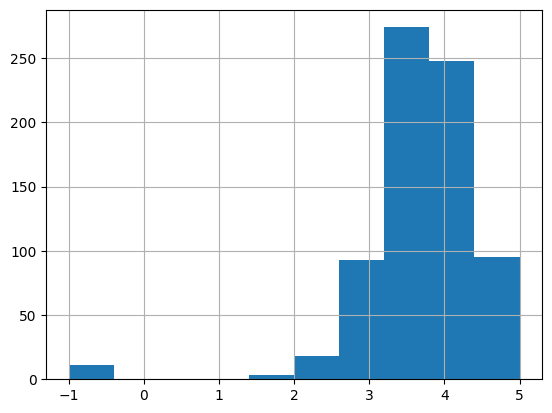

In [18]:
df.Rating.hist()

<Axes: >

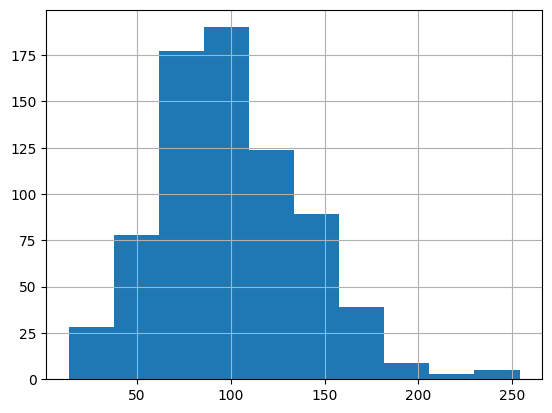

In [19]:
df.avg_salary.hist()

<Axes: >

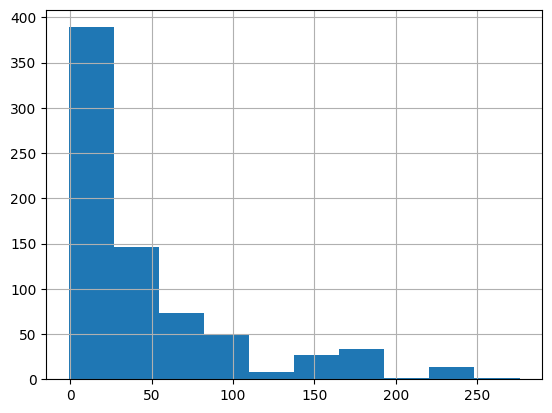

In [20]:
df.age.hist()

<Axes: >

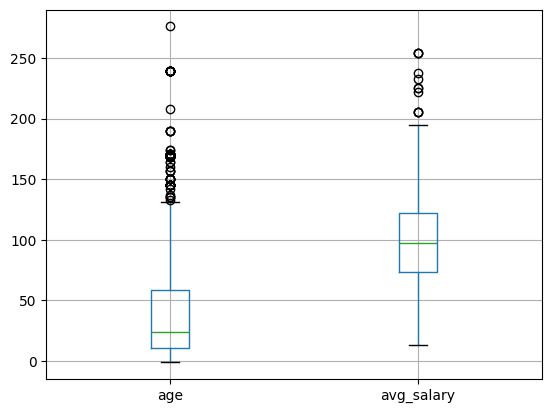

In [21]:
df.boxplot(column=['age','avg_salary'])

<Axes: >

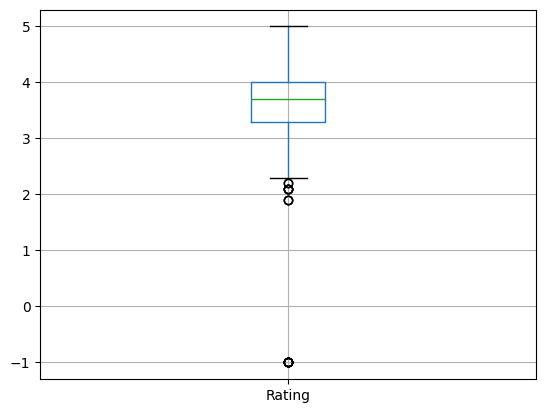

In [22]:
df.boxplot(column='Rating')

In [23]:
#correlation analysis
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
avg_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


<Axes: >

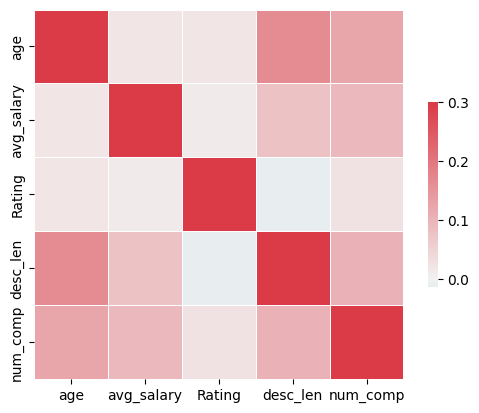

In [24]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(), vmax=.3,center=0,cmap=cmap,square=True, linewidths=0.5,cbar_kws={"shrink": 0.5})

In [25]:
## Categorical Data Analysis
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [26]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt', 'job_state', 'same_state','python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 200


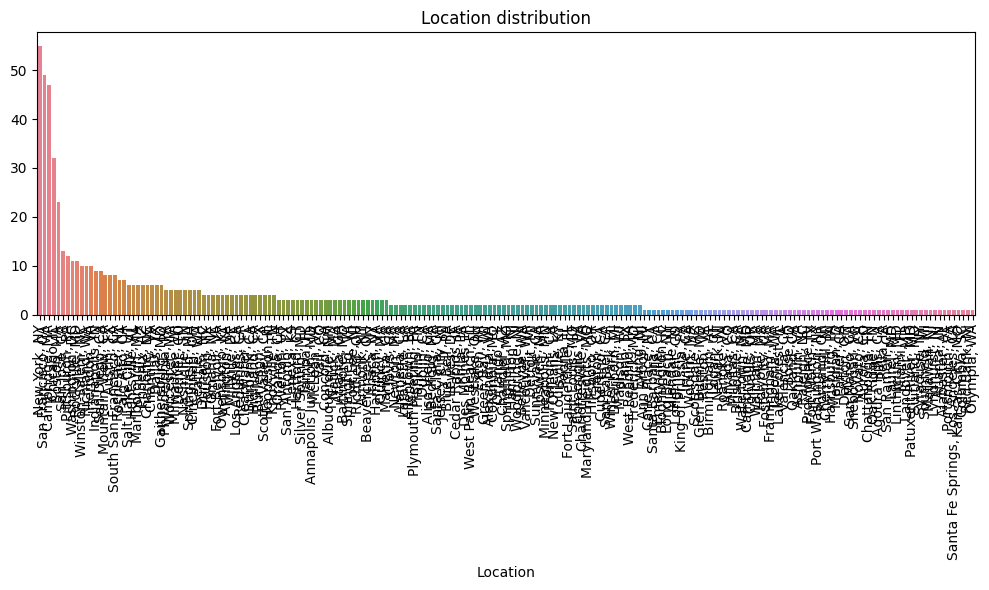

graph for Headquarters: total = 198


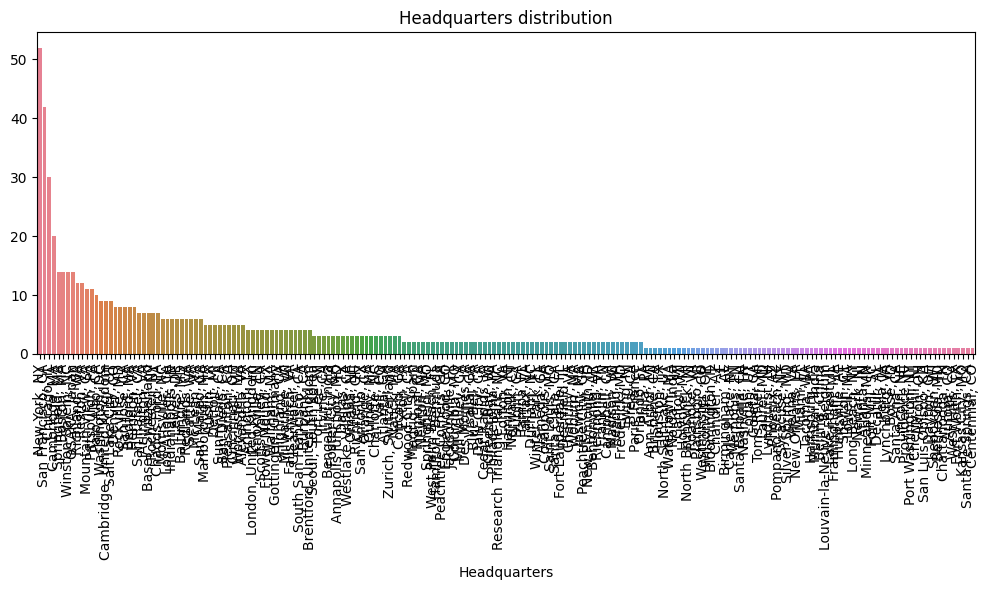

graph for Size: total = 9


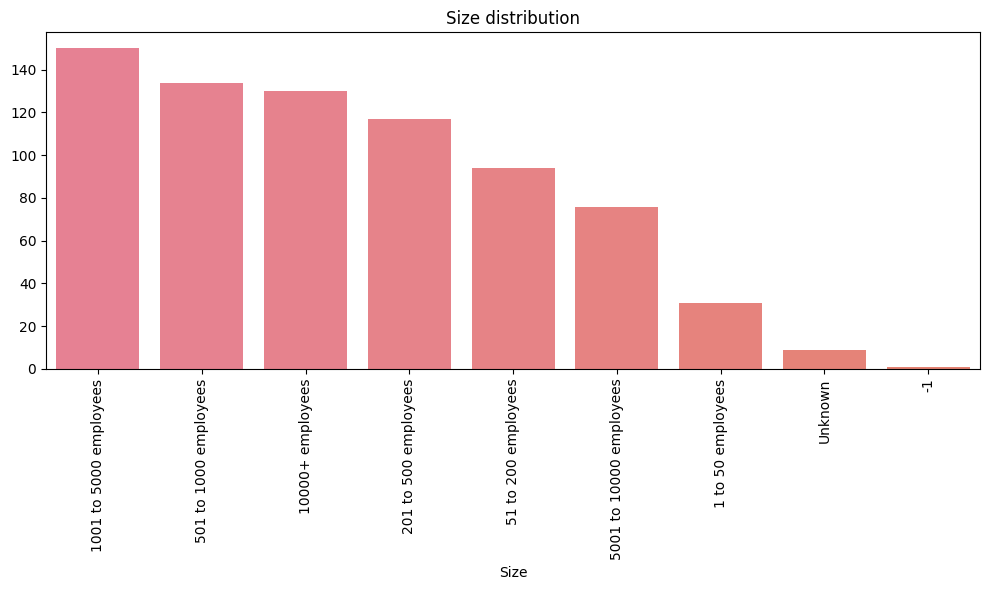

graph for Type of ownership: total = 11


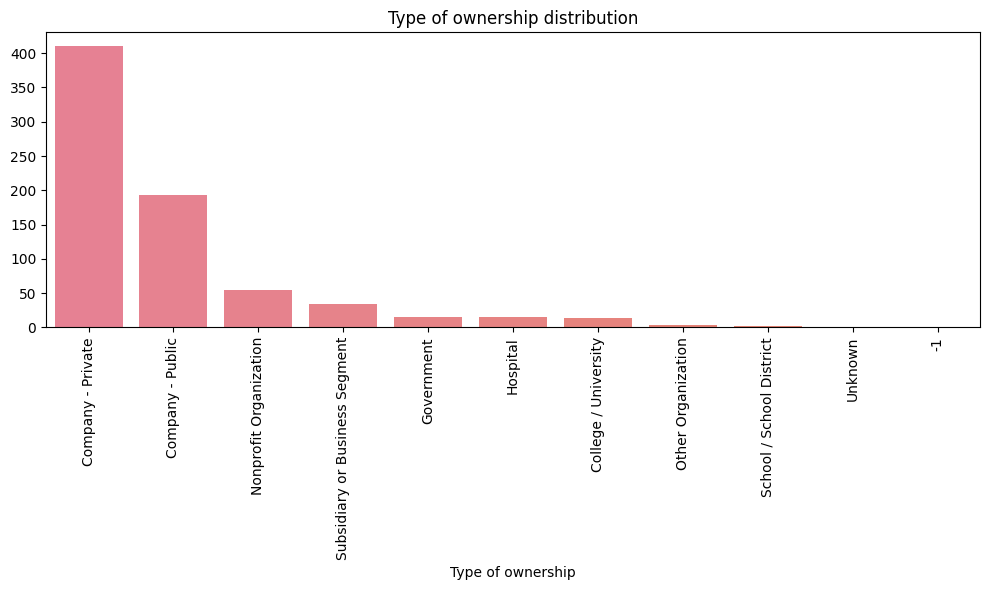

graph for Industry: total = 60


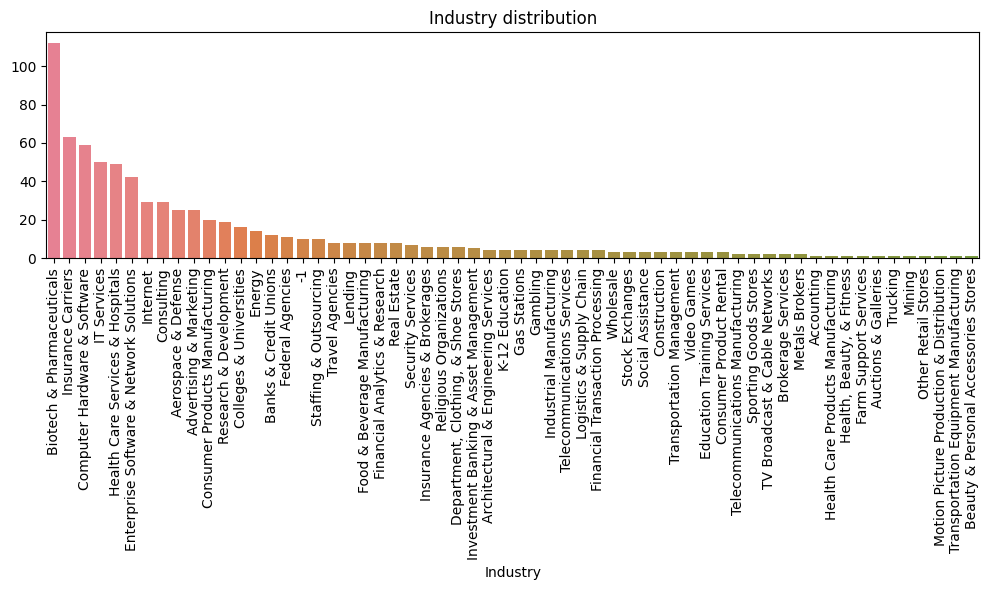

graph for Sector: total = 25


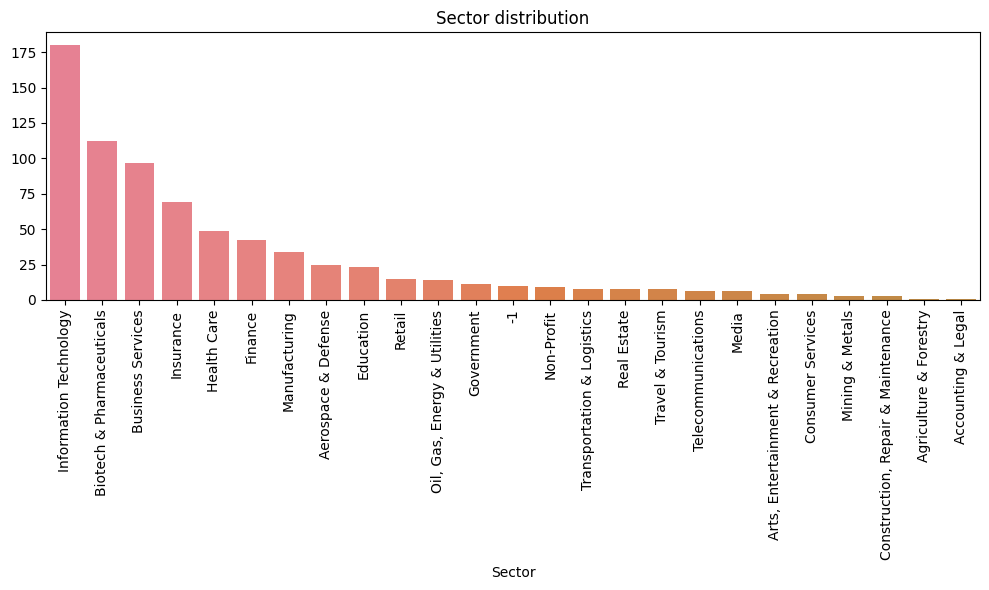

graph for Revenue: total = 14


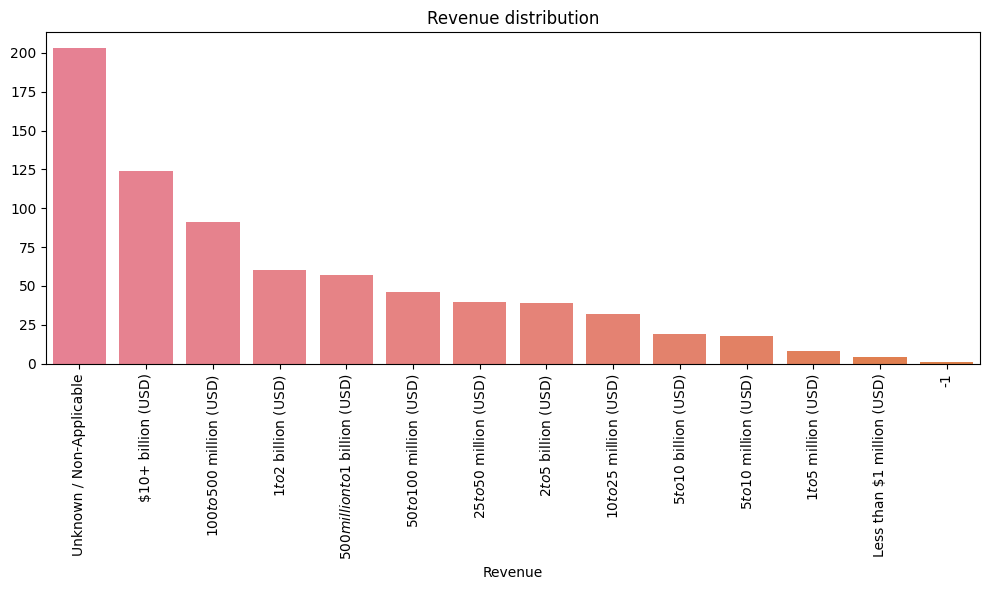

graph for company_txt: total = 343


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7040\1445953347.py:13: UserWarning: 
The palette list has fewer values (200) than needed (343) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num.values, palette=color_palette[:len(cat_num)], hue=cat_num.index, dodge=False, legend=False)


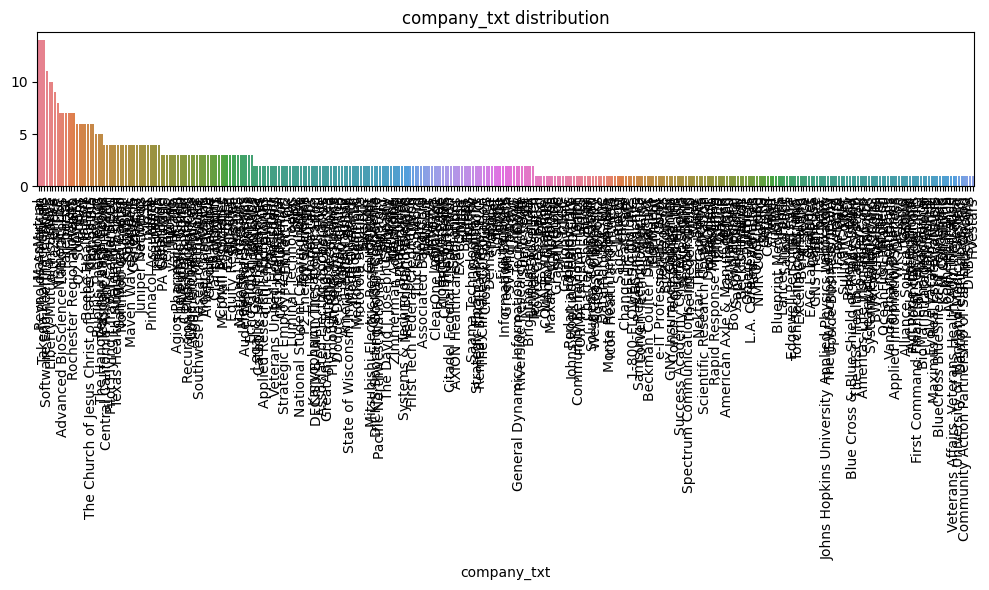

graph for job_state: total = 37


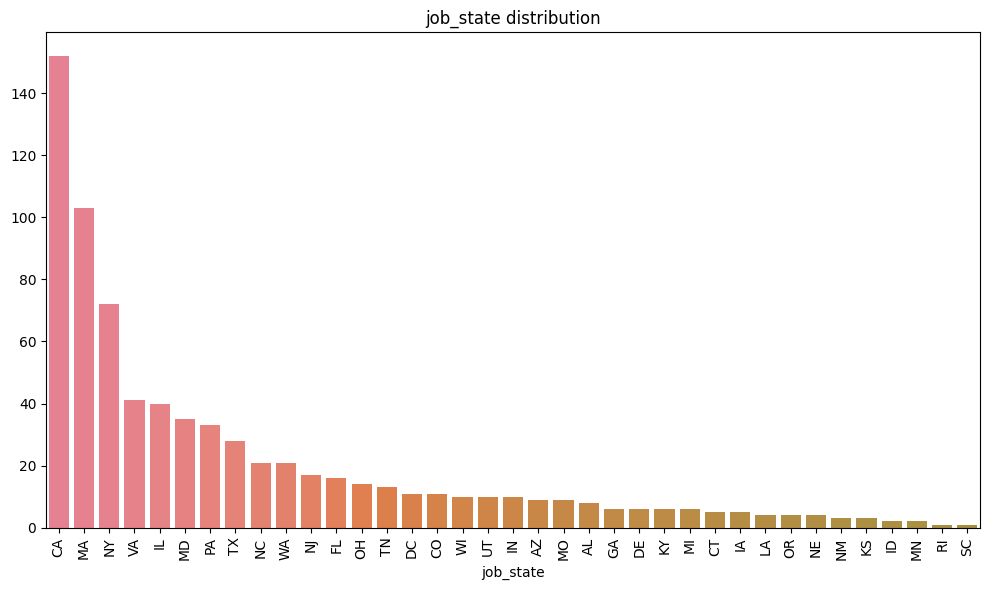

graph for same_state: total = 2


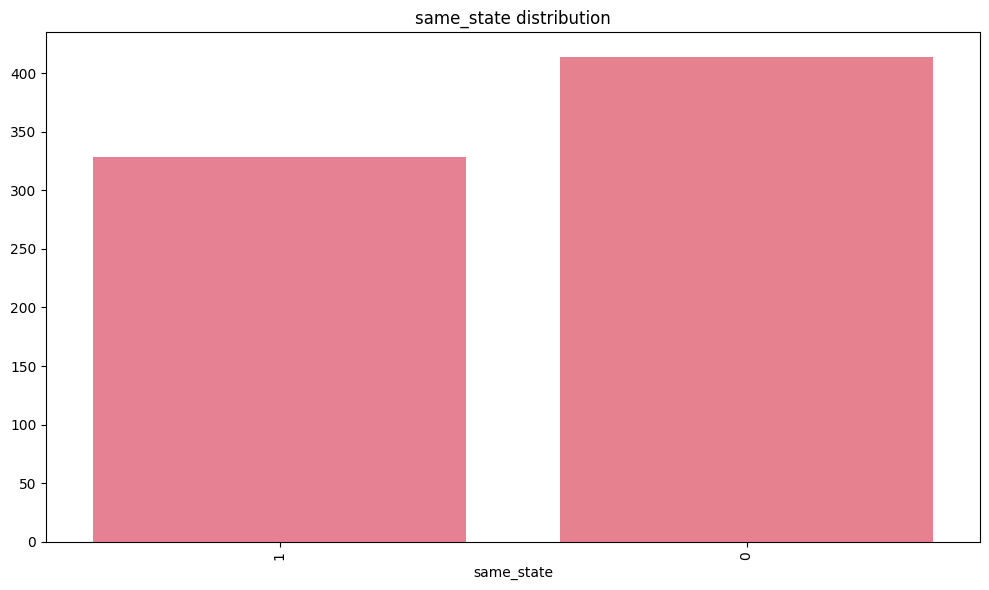

graph for python_yn: total = 2


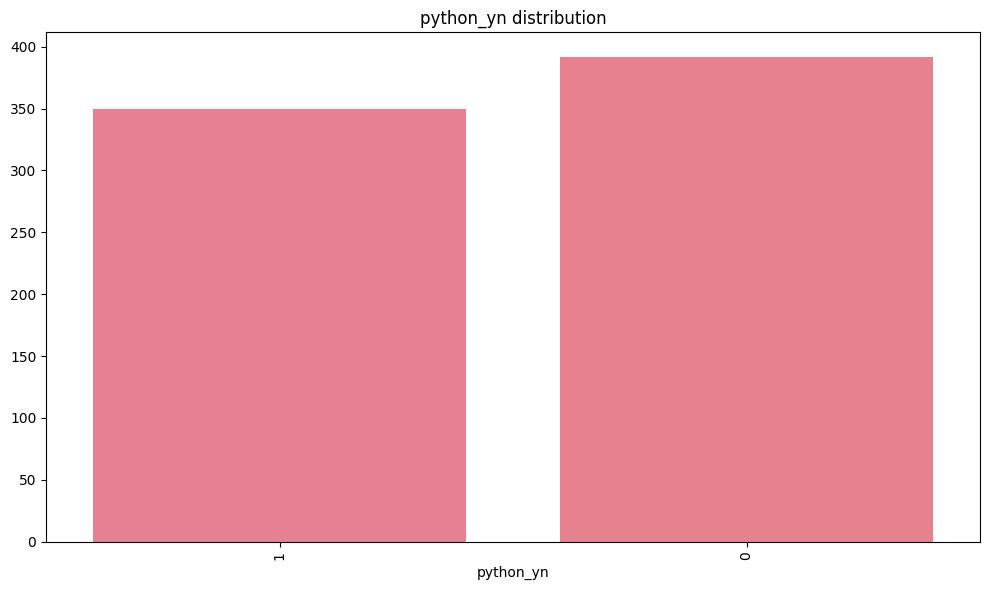

graph for R_yn: total = 2


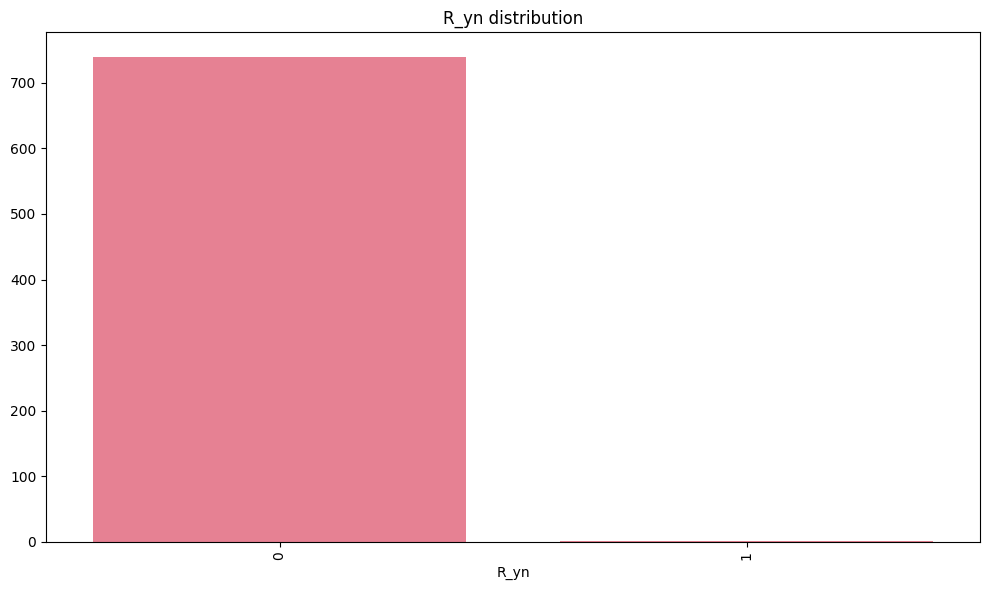

graph for spark: total = 2


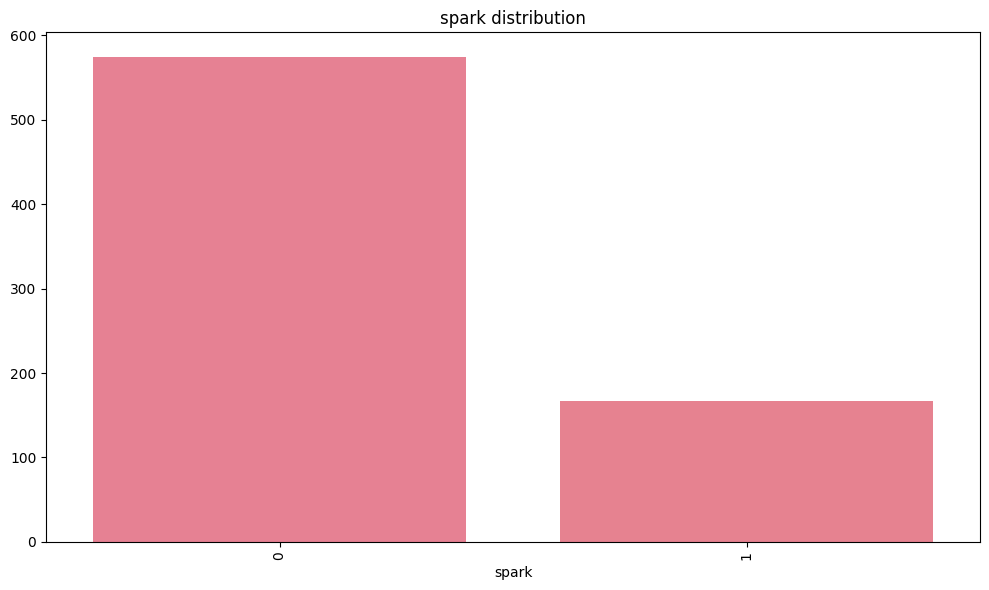

graph for aws: total = 2


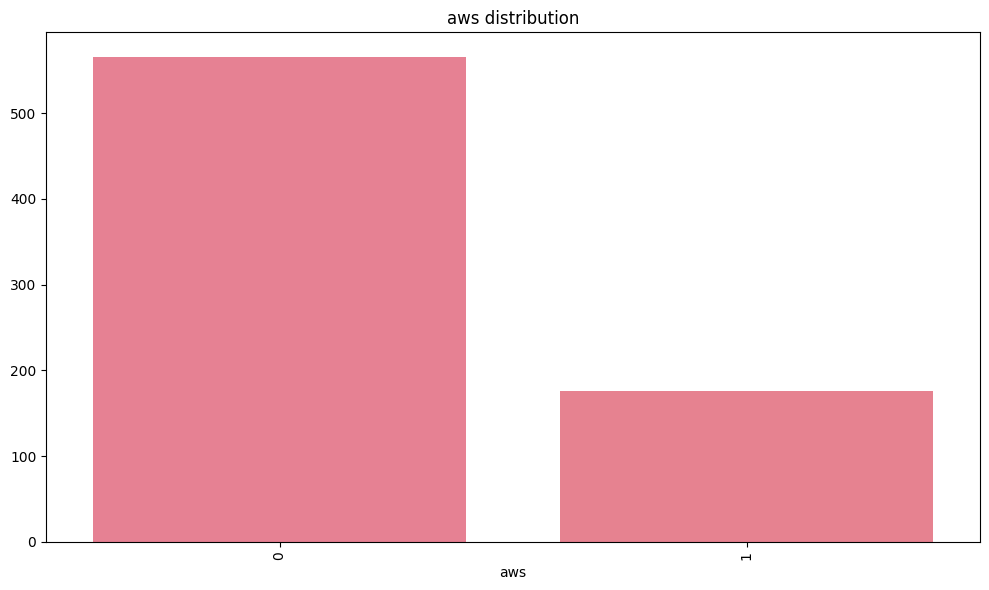

graph for excel: total = 2


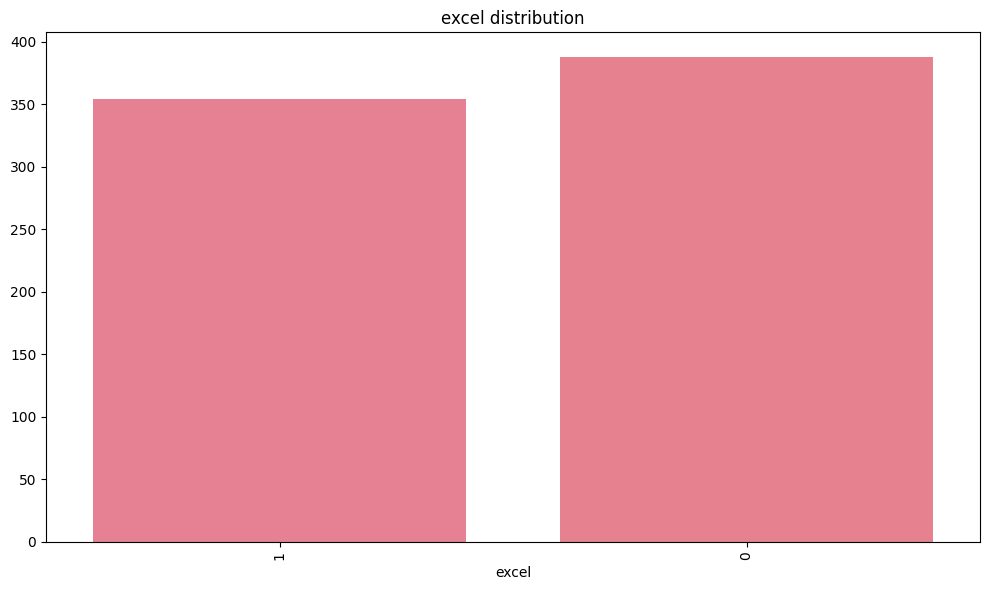

graph for job_simp: total = 7


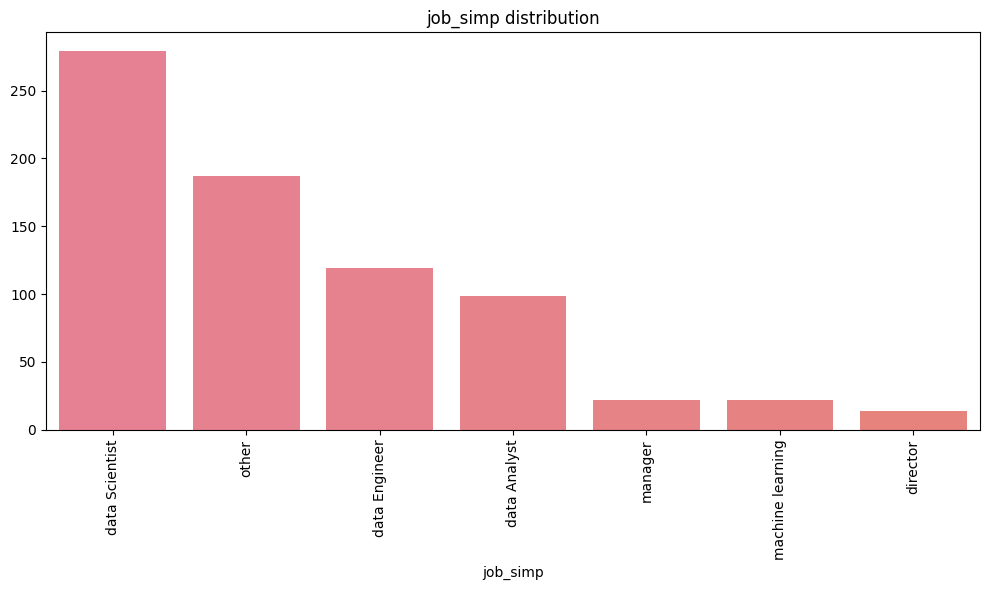

graph for seniority: total = 3


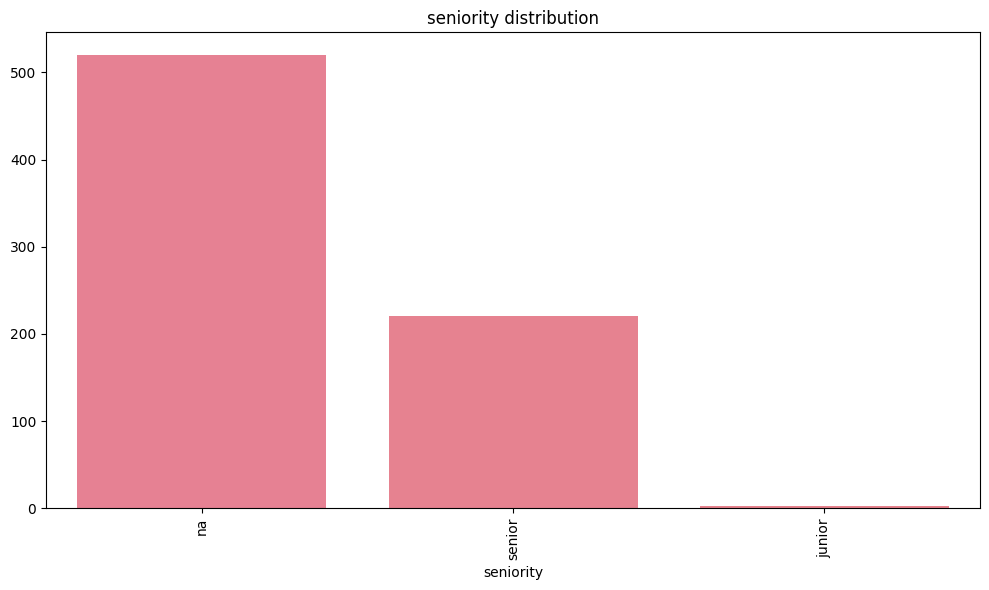

In [27]:
from matplotlib.ticker import FixedLocator

#  df_cat is the dataframe with categorical data
color_palette = sns.color_palette("husl", n_colors=200)  # Ensuring we have enough colors

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))

    plt.figure(figsize=(10, 6))
    
    # Plotting with the updated palette and hue
    chart = sns.barplot(x=cat_num.index, y=cat_num.values, palette=color_palette[:len(cat_num)], hue=cat_num.index, dodge=False, legend=False)
    
    # Setting the tick labels with FixedLocator
    chart.set_xticks(range(len(cat_num)))
    chart.set_xticklabels(cat_num.index, rotation=90)
    
    plt.title("%s distribution" % i)
    
    plt.tight_layout()
    plt.show()


graph for Location: total = 20


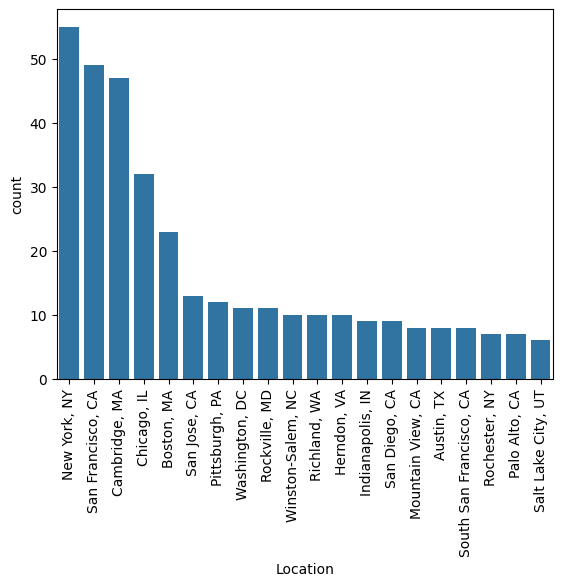

graph for Headquarters: total = 20


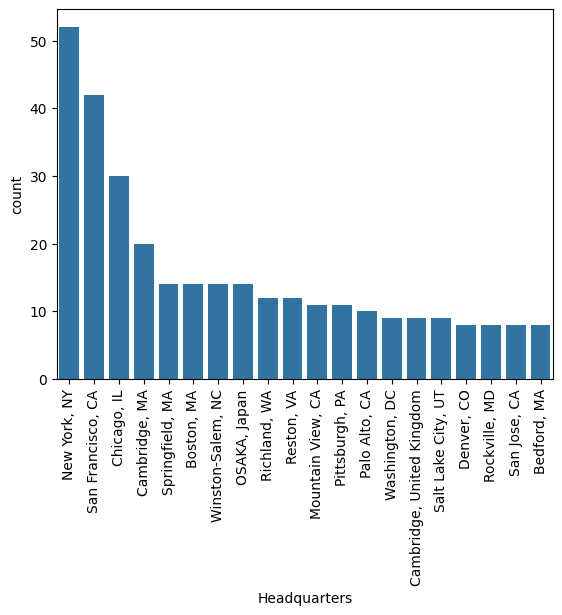

graph for company_txt: total = 20


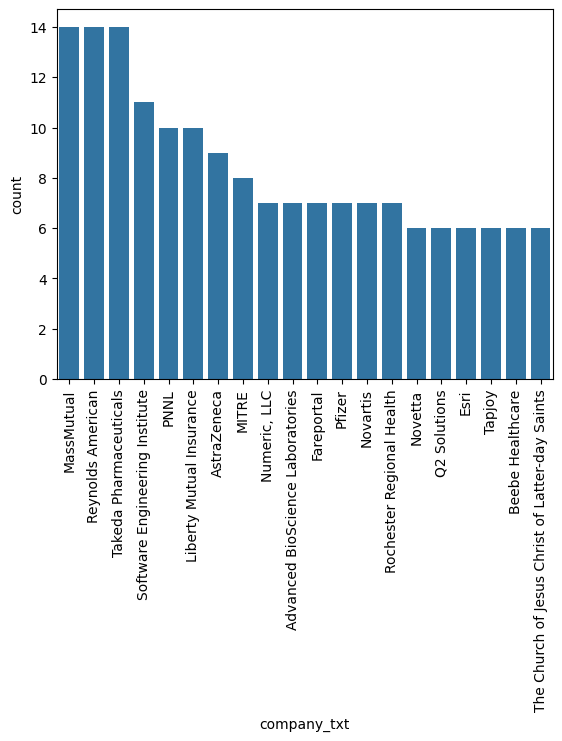

In [28]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticks(range(len(cat_num)))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [29]:
## pivot tables
pd.pivot_table(df, index='job_simp', values ='avg_salary')

,avg_salary
job_simp,
data Analyst,64.621212
data Engineer,105.403361
data Scientist,117.564516
director,168.607143
machine learning,126.431818
manager,84.022727
other,85.203209


In [30]:
pd.pivot_table(df, index =['job_simp','seniority'],values ='avg_salary')

avg_salary
job_simp         seniority            
data Analyst     junior      56.500000
                 na          60.812500
                 senior      75.480769
data Engineer    na          96.701220
                 senior     124.689189
data Scientist   junior     106.500000
                 na         107.043011
                 senior     138.956522
director         na         168.607143
machine learning na         119.133333
                 senior     142.071429
manager          na          84.022727
other            na          73.980620
                 senior     110.163793

In [31]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        other            54.000000
          data Scientist  113.500000
          data Analyst     58.833333
WA        other            97.500000
          data Scientist   99.764706
...                              ...
AZ        data Analyst     55.000000
          other           124.500000
AL        other            51.833333
          data Engineer    65.000000
          data Analyst     60.750000

[114 rows x 1 columns]

In [32]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [33]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                    
WI        other                      4
          data Scientist             3
          data Analyst               3
WA        other                      1
          data Scientist            17
          data Analyst               3
VA        other                      5
          machine learning           2
          data Scientist            18
          data Engineer             10
          data Analyst               6
UT        data Engineer              3
          data Analyst               4
          data Scientist             3
TX        other                      7
          data Scientist            13
          data Engineer              8
TN        data Scientist             1
          data Engineer             10
          data Analyst               2
SC        other                      1
RI        data Analyst               1
PA        machine learning           7
          data Engineer              1
          data Scientist             6
          data Analyst               8
          manager                    3
          other                      8
OR        data Scientist             3
          data Engineer              1
OH        other                      4
          data Scientist             7
          data Analyst               3
NY        other                     12
          machine learning           2
          data Scientist            40
          data Engineer              4
          data Analyst              14
NM        data Scientist             3
NJ        data Scientist             4
          data Analyst               5
          data Engineer              2
          manager                    2
          director                   2
          other                      2
NE        other                      4
NC        other                     12
          data Scientist             3
          data Engineer              6
MO        other                      3
          manager                    1
          data Scientist             3
          data Analyst               2
MN        data Engineer              1
          data Analyst               1
MI        manager                    2
          data Scientist             4
MD        other                     16
          data Scientist            13
          data Engineer              3
          data Analyst               3
MA        other                     46
          manager                    5
          director                   6
          data Scientist            30
          data Engineer             12
          data Analyst               4
LA        data Analyst               1
          data Engineer              2
          other                      1
KY        other                      4
          data Scientist             2
KS        machine learning           3
IN        other                      4
          data Scientist             2
          data Engineer              4
IL        data Analyst               3
          other                      6
          machine learning           2
          director                   6
          data Scientist            15
          data Engineer              8
ID        data Analyst               2
IA        data Analyst               2
          data Engineer              3
GA        data Scientist             3
          other                      3
FL        data Scientist             7
          data Engineer              3
          data Analyst               6
DE        other                      6
DC        data Scientist             5
          data Engineer              4
          data Analyst               2
CT        other                      3
          data Scientist             2
CO        machine learning           1
          data Engineer              3
          data Analyst               1
          other                      3
          data Scientist             3
CA        o

In [34]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [35]:
df_pivots= df[['Rating','Industry', 'Sector', 'Revenue','num_comp','hourly','employer_provided','python_yn', 'R_yn',
       'spark', 'aws', 'excel','Type of ownership','avg_salary']]


In [36]:
for i in df_pivots.columns:
    if i == 'avg_salary':  # Skip the 'avg_salary' column since it's the value to be aggregated
        continue
    try:
        print(i)
        pivot_table = pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False)
        print(pivot_table)
    except Exception as e:
        print(f"Error processing column {i}: {e}")


Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

In [37]:
pd.pivot_table(df_pivots, index='Revenue', columns ='python_yn', values='avg_salary', aggfunc='count').sort_values('Revenue', ascending = False)

python_yn,0,1
Revenue,,
Unknown / Non-Applicable,93.0,110.0
Less than $1 million (USD),1.0,3.0
-1,1.0,NaN
$500 million to $1 billion (USD),29.0,28.0
$50 to $100 million (USD),21.0,25.0
$5 to $10 million (USD),9.0,9.0
$5 to $10 billion (USD),9.0,10.0
$25 to $50 million (USD),24.0,16.0
$2 to $5 billion (USD),17.0,22.0


In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
i

# Download the stopwords from NLTK
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

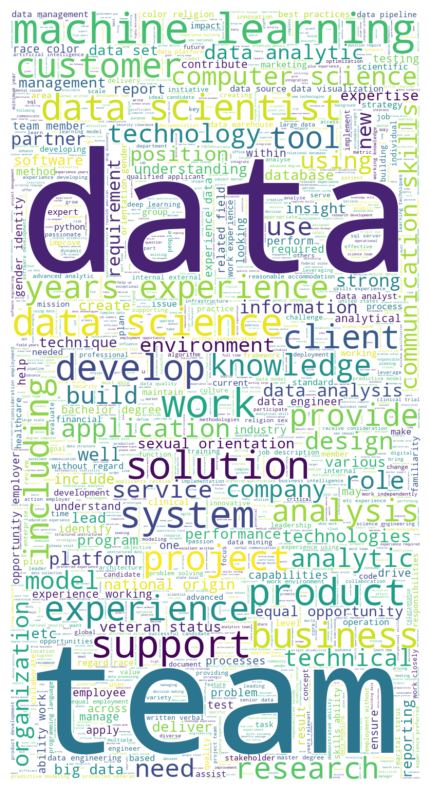

In [39]:

# Assuming df is your DataFrame and 'Job Description' is the column with the text data
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
text = " ".join(words_filtered)

wc = WordCloud(
    background_color="white", 
    random_state=1, 
    stopwords=STOPWORDS, 
    max_words=2000, 
    width=800, 
    height=1500
)

wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")  # Pass the wordcloud object to imshow
plt.axis('off')
plt.show()
